In [133]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [134]:
data = pd.read_csv('../input/train.csv')
data_val = pd.read_csv('../input/test.csv')

    

In [135]:
data_val.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [136]:
# inspect the type of variables in pandas
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [137]:
print('Number of House labels : ', len(data.Id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House labels :  1460
Number of Houses in the Dataset:  1460


In [138]:
# We can see that HouseId is not the variable that we can use
# Find categorical variables
categorical = [var for var in data.columns if data[var].dtypes == 'O']
print('There are {} categorical variables'.format(len(categorical)))

There are 43 categorical variables


In [139]:
numerical = [var for var in data.columns if data[var].dtypes != 'O']
print('There are {} numerical variables'.format(len(numerical)))

There are 38 numerical variables


### Find discrete variables
To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values. See below.

In [140]:
discrete = []
for var in numerical:
    if len(data[var].unique()) < 20:
        print(var,' values: ',data[var].unique())
        discrete.append(var)

print('There are {} discrete variables'.format(len(discrete)))

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold  values:  [2008 2007 2006 2009 2010]
There are 15 discrete variables


### Missing values

In [141]:
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


Let's inspect the type of those variables with a lot of missing values

In [142]:
for var in data.columns:
    if data[var].isnull().mean() > 0.8:
        print(var, data[var].unique())

Alley [nan 'Grvl' 'Pave']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [143]:
# Hmm, why would we need to take care of the fence. I used to buy a house and I rather pay a few grand to renew stuff
#a little bit. But let's keep going. We will need to fill those out.

continuous = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice']]
continuous

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

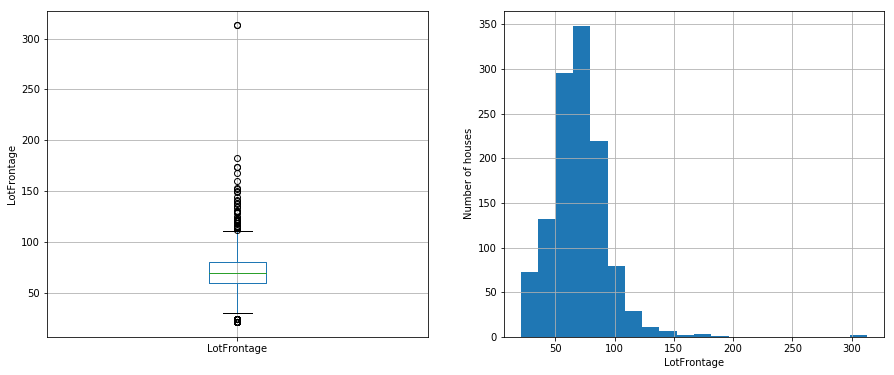

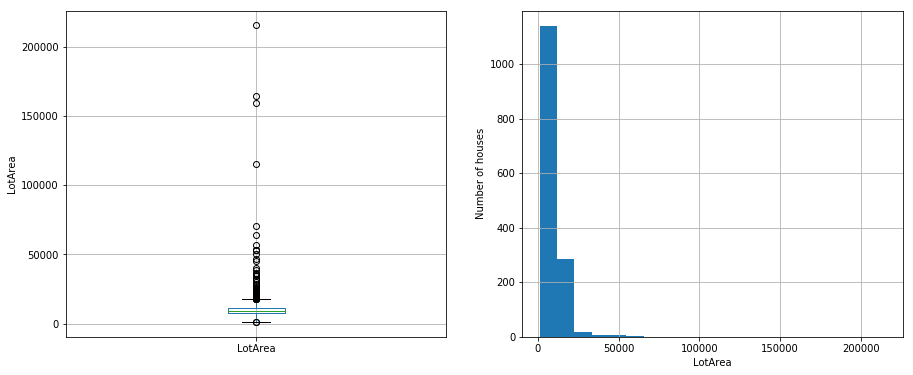

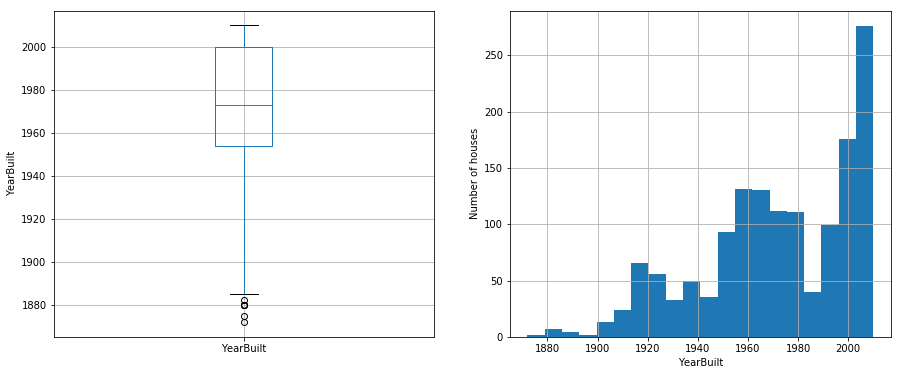

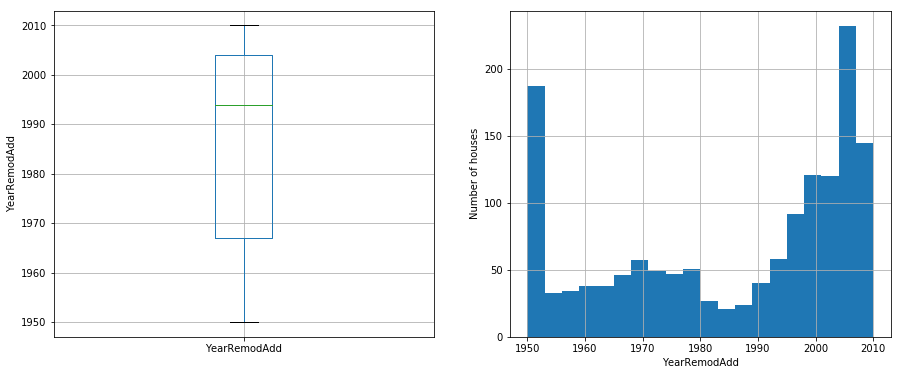

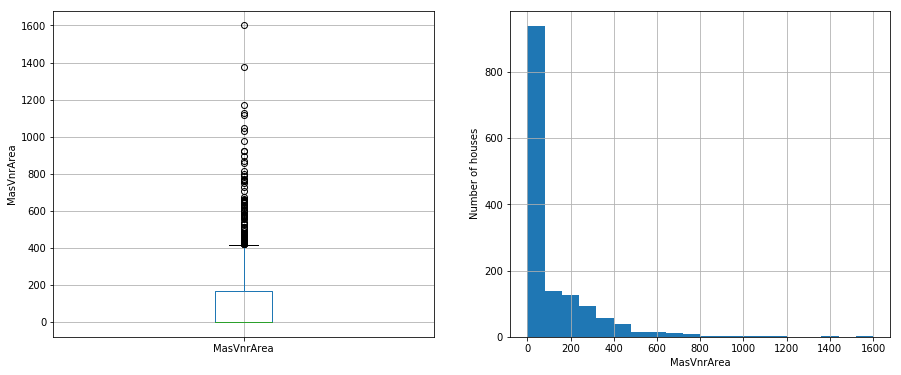

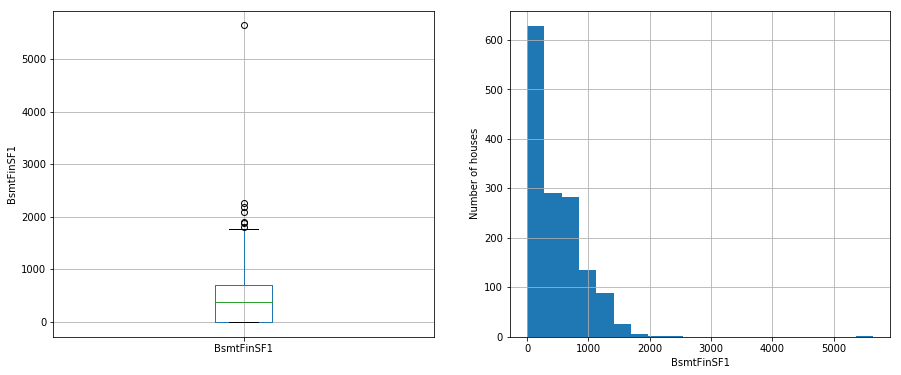

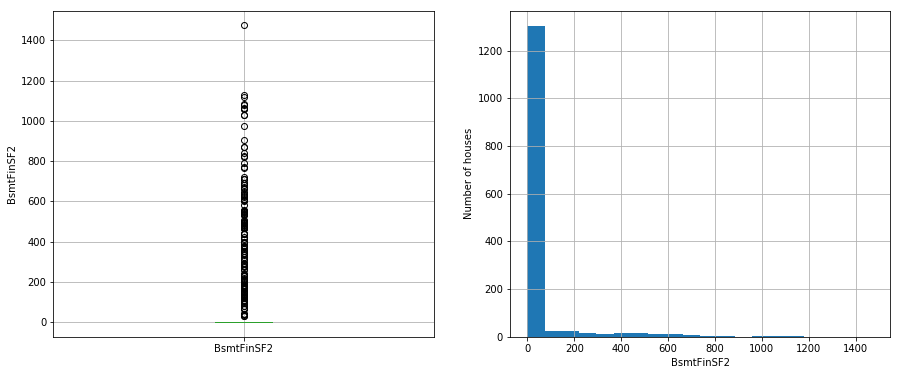

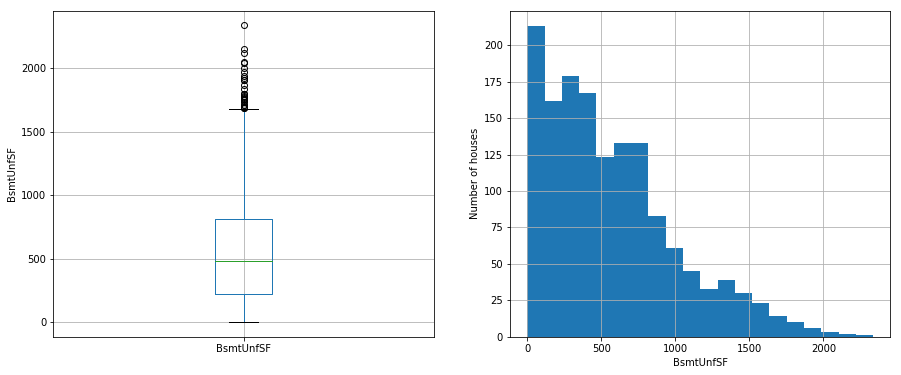

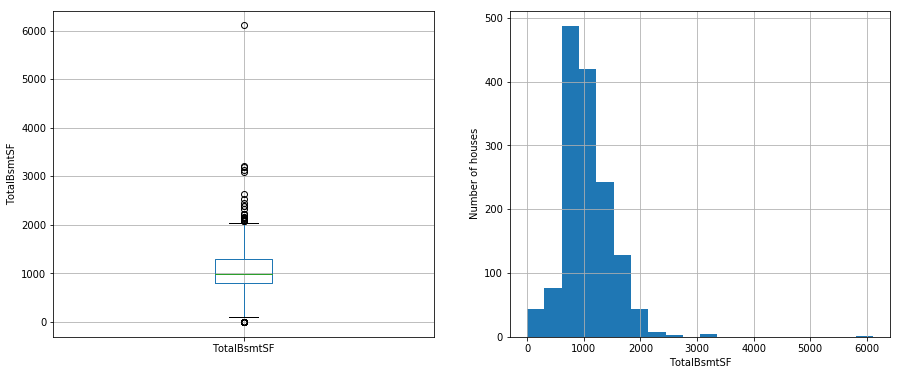

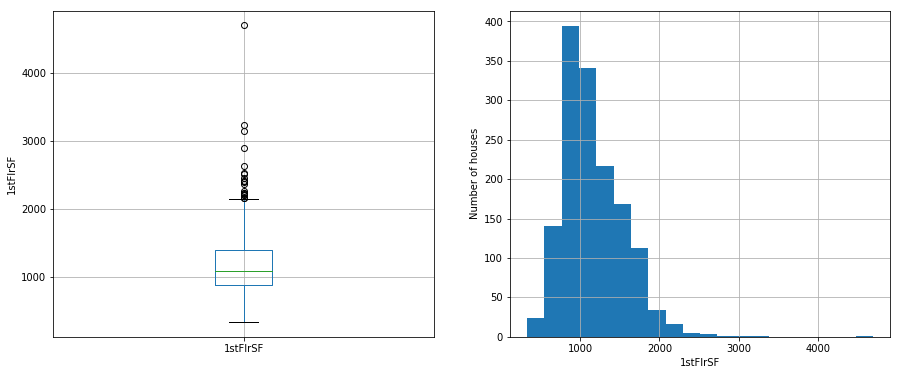

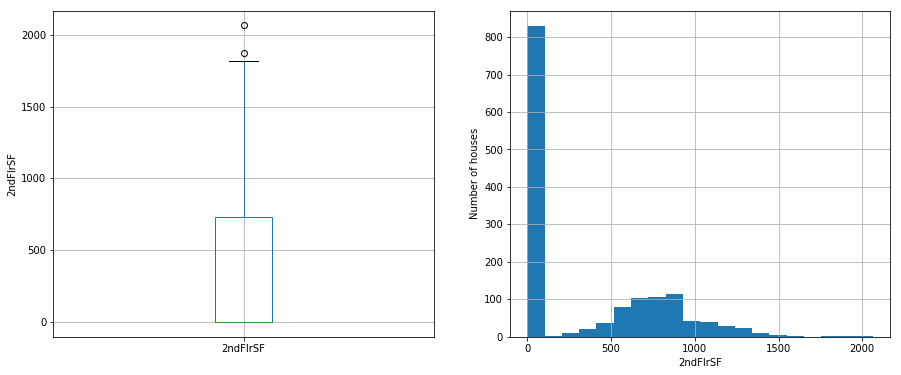

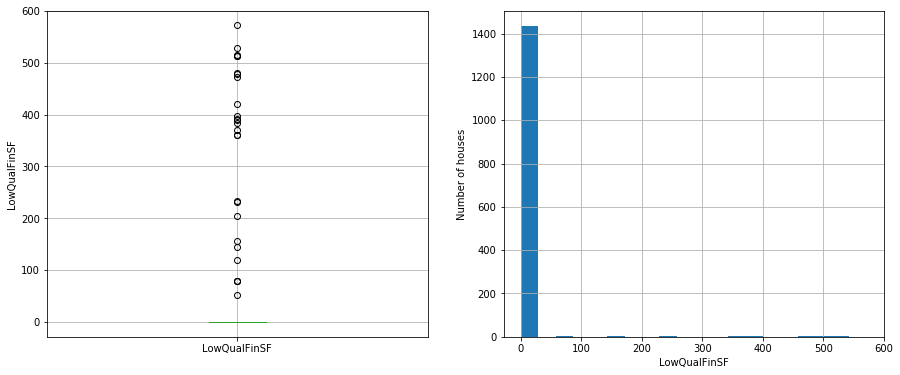

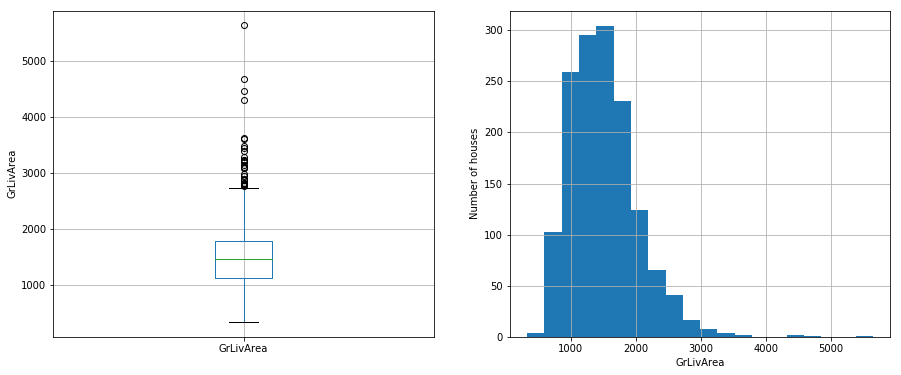

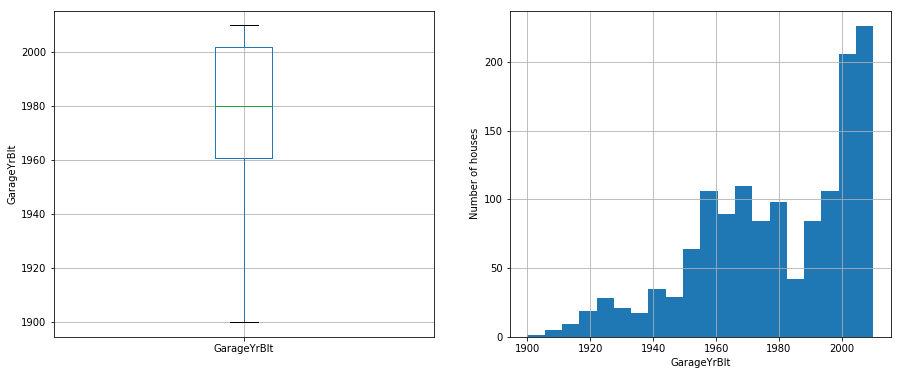

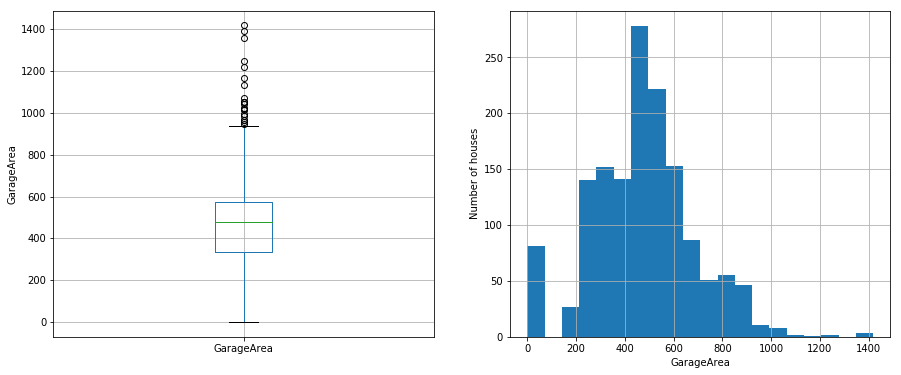

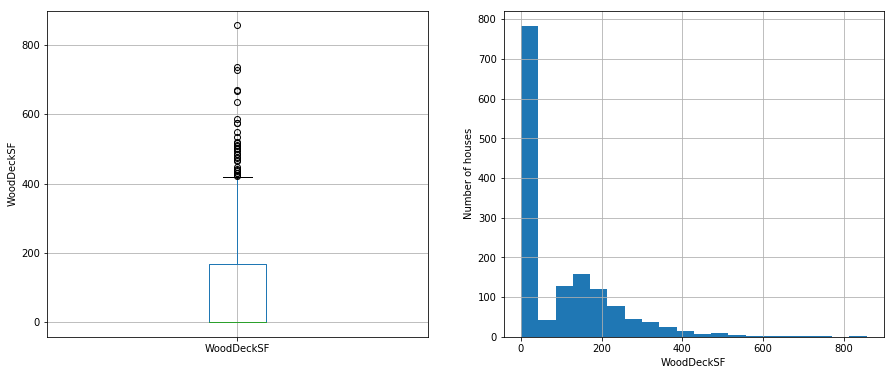

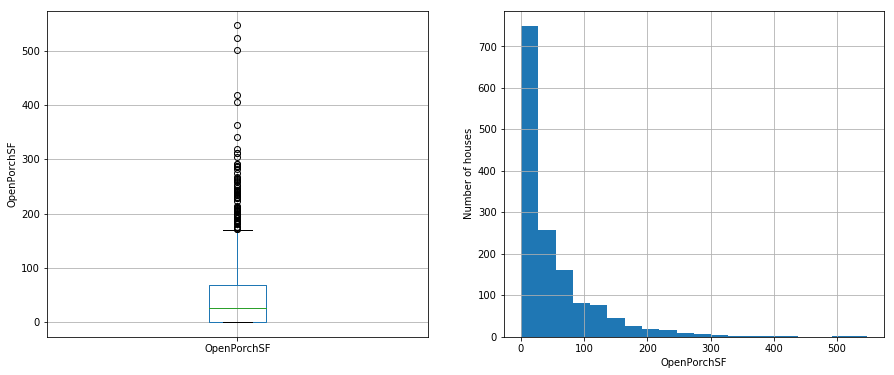

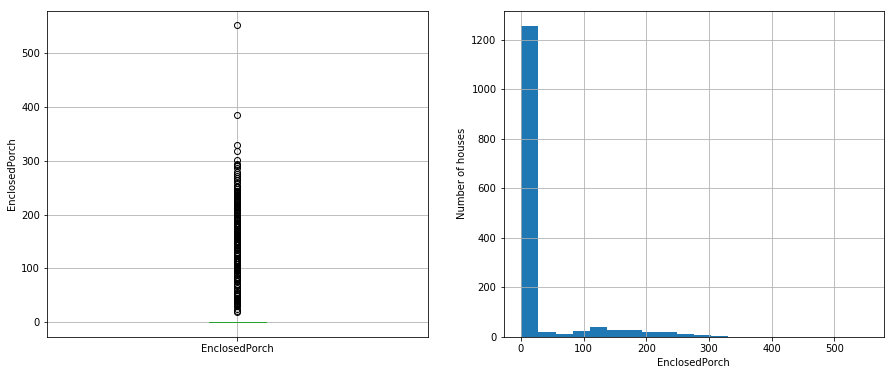

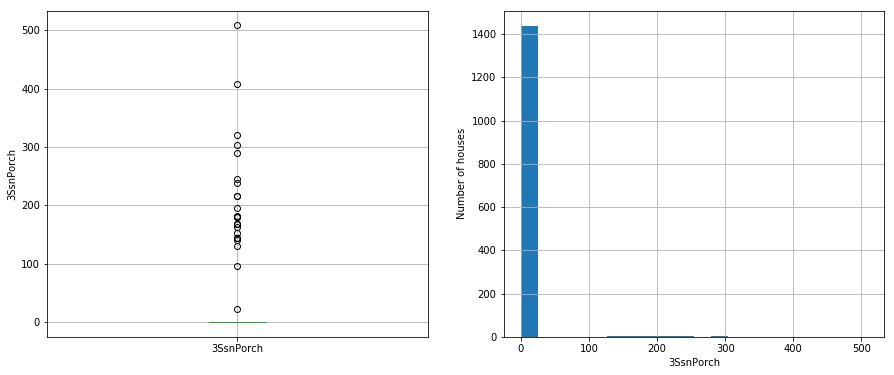

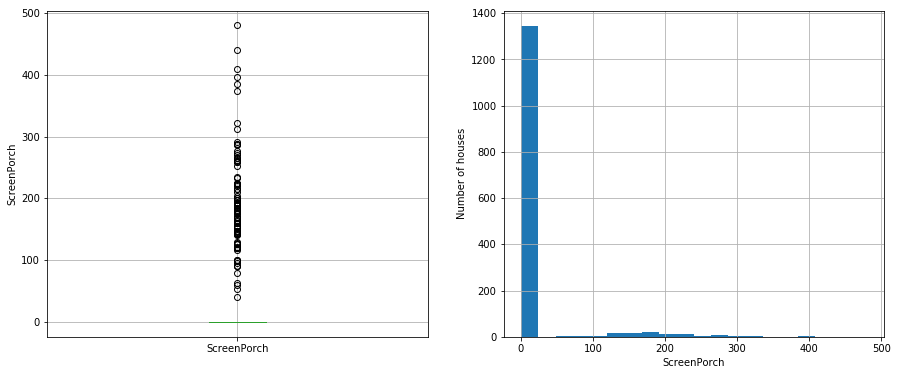

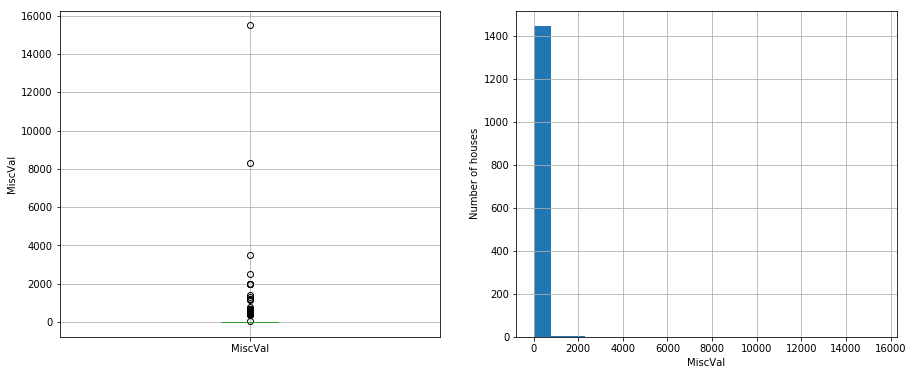

In [144]:
for var in continuous:
    plt.figure(figsize = (15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()


The majority of the continuos variables seem to contain outliers. In addition, the majority of variables are not normally distributed. Discretisation will be needed. Trees will be used to find the right buckets onto which varibales will be divided.

Outlies in discrete variables
Let's calculate the percentage of houses for each of the values that can take the discrete variables in the titanic dataset. I will call outliers, those values that are present in less than 1% of the houses. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in essence can be pre-processed / eng

In [145]:
for var in discrete:
    print(data[var].value_counts() / np.float(len(data)))
    print()

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64

0    0.586301
1    0.402740
2    0.010274
3    0.000685
Name: BsmtFullBath, dtype: float64

0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64

2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64

0    0.625342
1    0.366438
2    0.008219
Name: HalfBath, dtype: float64

3    0.550685
2    0.245205
4    0.145890
1    0

In [146]:
for var in categorical:
    print(var, ' contains ', len(data[var].unique()),' labels')

MSZoning  contains  5  labels
Street  contains  2  labels
Alley  contains  3  labels
LotShape  contains  4  labels
LandContour  contains  4  labels
Utilities  contains  2  labels
LotConfig  contains  5  labels
LandSlope  contains  3  labels
Neighborhood  contains  25  labels
Condition1  contains  9  labels
Condition2  contains  8  labels
BldgType  contains  5  labels
HouseStyle  contains  8  labels
RoofStyle  contains  6  labels
RoofMatl  contains  8  labels
Exterior1st  contains  15  labels
Exterior2nd  contains  16  labels
MasVnrType  contains  5  labels
ExterQual  contains  4  labels
ExterCond  contains  5  labels
Foundation  contains  6  labels
BsmtQual  contains  5  labels
BsmtCond  contains  5  labels
BsmtExposure  contains  5  labels
BsmtFinType1  contains  7  labels
BsmtFinType2  contains  7  labels
Heating  contains  6  labels
HeatingQC  contains  5  labels
CentralAir  contains  2  labels
Electrical  contains  6  labels
KitchenQual  contains  4  labels
Functional  contains  7 

Most of the variables, contain only a few labels. Then, we do not have to deal with high cardinality. That is good news!

In [147]:
X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size = 0.2, random_state=(13))
X_train.shape, X_test.shape

((1168, 81), (292, 81))

In [148]:
for col in continuous:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

LotFrontage 0.17893835616438356
MasVnrArea 0.0059931506849315065
GarageYrBlt 0.059075342465753425


LotFrontage and GarageYrBlt: create additional variable with NA + median imputation

CMasVnrArea: median imputation

In [149]:
# add variables indicating missingness + median imputation
for df in [X_train, X_test, data_val]:
    for var in ['LotFrontage', 'GarageYrBlt']:
        df[var + '_NA'] = np.where(df[var].isnull(),1 , 0)
        df[var].fillna(X_train[var].median(), inplace = True)
        
    for df in [X_train, X_test, data_val]:
        df.MasVnrArea.fillna(df.MasVnrArea.median(), inplace = True)

In [150]:
data_val.MSZoning.unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

Discrete variables

In [151]:
for col in discrete:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

There are no missing data in the discrete variables. Good, then we don't have to engineer them

In [152]:
for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

Alley 0.9366438356164384
MasVnrType 0.0059931506849315065
BsmtQual 0.025684931506849314
BsmtCond 0.025684931506849314
BsmtExposure 0.026541095890410957
BsmtFinType1 0.025684931506849314
BsmtFinType2 0.026541095890410957
Electrical 0.0008561643835616438
FireplaceQu 0.4794520547945205
GarageType 0.059075342465753425
GarageFinish 0.059075342465753425
GarageQual 0.059075342465753425
GarageCond 0.059075342465753425
PoolQC 0.9957191780821918
Fence 0.8202054794520548
MiscFeature 0.9691780821917808



I will add a 'Missing' Label to all of them. If the missing data are rare, I will handle those together with rare labels in a subsequent engineering step.

In [153]:
for df in [X_train, X_test, data_val]:
    for var in categorical:
        df[var].fillna('Missing', inplace = True)

In [154]:
# check absence of null values
for var in X_train.columns:
    if X_train[var].isnull().sum()>0:
        print(var, X_train[var].isnull().sum())

In [155]:

# check absence of null values
for var in X_train.columns:
    if X_test[var].isnull().sum()>0:
        print(var, X_test[var].isnull().sum())

In [156]:
# check absence of null values
data_val_vars = []
for var in X_train.columns:
    if var!='SalePrice' and data_val[var].isnull().sum()>0:
        print(var, data_val[var].isnull().sum())
        data_val_vars.append(var)

BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageCars 1
GarageArea 1


In [157]:
for var in data_val_vars:
    data_val[var].fillna(X_train[var].median(), inplace=True)


### Outliers in Numerical variables

In order to tackle outliers and skewed distributions at the same time, I suggested I would do discretisation. And in order to find the optimal buckets automatically, I would use decision trees to find the buckets for me.

In [158]:
def tree_binariser(var):
    score_ls = [] # here I will store the mse

    for tree_depth in [1,2,3,4]:
        # call the model
        tree_model = DecisionTreeRegressor(max_depth=tree_depth)

        # train the model using 3 fold cross validation
        scores = cross_val_score(tree_model, X_train[var].to_frame(), y_train, cv=3, scoring='neg_mean_squared_error')
        score_ls.append(np.mean(scores))

    # find depth with smallest mse
    depth = [1,2,3,4][np.argmax(score_ls)]
    #print(score_ls, np.argmax(score_ls), depth)

    # transform the variable using the tree
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train[var].to_frame(), X_train.SalePrice)
    X_train[var] = tree_model.predict(X_train[var].to_frame())
    X_test[var] = tree_model.predict(X_test[var].to_frame())
    data_val[var] =  tree_model.predict(data_val[var].to_frame())

In [159]:
X_train[continuous].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
809,90.0,8100,1898,1965,0.0,0,0,849,849,1075,1063,0,2138,1910.0,360,40,156,0,0,0,0
608,78.0,12168,1934,1998,0.0,428,0,537,965,1940,1254,0,3194,1934.0,380,0,0,0,0,0,0
1189,60.0,7500,1999,1999,0.0,0,0,994,994,1028,776,0,1804,1999.0,442,140,60,0,0,0,0
1039,21.0,1477,1970,1970,0.0,509,0,121,630,630,0,0,630,1970.0,286,0,0,0,0,0,0
1297,35.0,3675,2005,2006,82.0,547,0,0,547,1072,0,0,1072,2005.0,525,0,44,0,0,0,0


In [160]:
for var in continuous:
    print(var, len(X_train[var].unique()))

LotFrontage 104
LotArea 883
YearBuilt 107
YearRemodAdd 61
MasVnrArea 285
BsmtFinSF1 540
BsmtFinSF2 120
BsmtUnfSF 679
TotalBsmtSF 624
1stFlrSF 659
2ndFlrSF 356
LowQualFinSF 18
GrLivArea 734
GarageYrBlt 96
GarageArea 393
WoodDeckSF 253
OpenPorchSF 178
EnclosedPorch 106
3SsnPorch 17
ScreenPorch 69
MiscVal 19


In [161]:
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
    data_val[variable] = np.where(data_val[variable].isin(frequent_cat), data_val[variable], 'Rare')

In [162]:
for var in ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']:
    data_val[var] = data_val[var].astype('int')

In [163]:
# find infrequent labels in categorical variables
for var in categorical:
    rare_imputation(var)
    
for var in discrete:
    rare_imputation(var)

In [164]:
for var in X_train.columns:
    if var!='SalePrice' and data_val[var].isnull().sum()>0:
        print(var, data_val[var].isnull().sum())
        data_val_vars.append(var)

In [167]:

# Fare in the submission dataset contains one null value, I will replace it by the median 
for var in data_val_vars:
    data_val[var].fillna(data_val[var].mode()[0], inplace=True)

In [168]:

# let's check that it worked
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

MSZoning RL      0.783390
RM      0.152397
FV      0.047945
Rare    0.016267
Name: MSZoning, dtype: float64

Street Pave    0.995719
Rare    0.004281
Name: Street, dtype: float64

Alley Missing    0.936644
Grvl       0.035103
Rare       0.028253
Name: Alley, dtype: float64

LotShape Reg     0.638699
IR1     0.327911
Rare    0.033390
Name: LotShape, dtype: float64

LandContour Lvl     0.902397
Bnk     0.038527
HLS     0.035959
Rare    0.023116
Name: LandContour, dtype: float64

Utilities AllPub    0.999144
Rare      0.000856
Name: Utilities, dtype: float64

LotConfig Inside     0.729452
Corner     0.178082
CulDSac    0.058219
FR2        0.030822
Rare       0.003425
Name: LotConfig, dtype: float64

LandSlope Gtl     0.943493
Mod     0.047945
Rare    0.008562
Name: LandSlope, dtype: float64

Neighborhood Rare       0.173801
NAmes      0.156678
CollgCr    0.108733
OldTown    0.074486
Edwards    0.066781
Somerst    0.063356
Gilbert    0.056507
NridgHt    0.051370
Sawyer     0.051370
NWAmes 

In [169]:

for var in X_train.columns:
    if var!='SalePrice' and data_val[var].isnull().sum()>0:
        print(var, data_val[var].isnull().sum())

### Encode categorical and discrete variables

In [170]:
def encode_categorical_variables(var, target):
        # make label to price dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        data_val[var] = data_val[var].map(ordered_labels)

# encode labels in categorical vars
for var in categorical:
    encode_categorical_variables(var, 'SalePrice')
    
# encode labels in discrete vars
for var in discrete:
    encode_categorical_variables(var, 'SalePrice')

In [171]:
for var in X_train.columns:
    if var!='SalePrice' and data_val[var].isnull().sum()>0:
        print(var, data_val[var].isnull().sum())

In [172]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
809,810,133401.492537,124071.735955,90.0,8100,180220.961307,182607.033821,164235.662198,179395.096774,180060.514996,181079.735577,178812.588022,125065.045977,184174.899309,180166.276817,185231.129990,134091.120000,133109.322884,200738.708955,1898,1965,219807.301802,179021.435652,166650.333333,168561.757009,155929.963663,0.0,144316.055249,183212.927593,223315.00381,140109.216475,183070.263308,164148.110381,169376.713889,0,183441.398406,0,849,849,181129.258093,141951.701149,103995.621622,119455.838235,1075,1063,0,2138,164954.389928,180097.844203,213018.604918,162711.061308,156944.781690,109500.000000,139630.855705,223150.675676,182552.07989,141247.300000,141247.300000,133125.331230,1910.0,141362.018595,184604.732523,360,123253.526316,126985.441860,113123.215190,40,156,0,0,0,179356.965606,179356.965606,147195.834783,181061.464664,0,192596.634921,180045.292419,174032.415764,175055.918050,106000,0,0
608,609,172634.541667,190135.701639,78.0,12168,180220.961307,182607.033821,164235.662198,223567.619048,180060.514996,176399.497653,202468.196429,217201.761905,184174.899309,180166.276817,185231.129990,209631.471074,276703.746269,156378.246231,1934,1998,170378.882736,179021.435652,166650.333333,147939.923567,155929.963663,0.0,144316.055249,183212.927593,223315.00381,202951.686992,183070.263308,185293.722222,150575.000000,428,183441.398406,0,537,965,181129.258093,141951.701149,185166.768739,185760.516791,1940,1254,0,3194,164954.389928,180097.844203,213018.604918,210372.653302,222258.692771,182301.728495,139630.855705,291752.833333,182552.07989,242605.965909,224845.494881,153313.130435,1934.0,141362.018595,184604.732523,380,187164.691205,187277.317235,186131.818779,0,0,0,0,0,179356.965606,179356.965606,186241.698330,181061.464664,0,196678.583333,186818.919540,174032.415764,147495.392857,359100,0,0
1189,1190,239042.336066,190135.701639,60.0,7500,180220.961307,182607.033821,164235.662198,179395.096774,180060.514996,176399.497653,178812.588022,192106.151515,184174.899309,180166.276817,185231.129990,209631.471074,206160.279693,200738.708955,1999,1999,170378.882736,179021.435652,211418.944310,212272.487562,155929.963663,0.0,144316.055249,183212.927593,223315.00381,140109.216475,183070.263308,164148.110381,169376.713889,0,183441.398406,0,994,994,181129.258093,158277.818653,185166.768739,185760.516791,1028,776,0,1804,164954.389928,180097.844203,213018.604918,210372.653302,181209.757622,182301.728495,213738.128205,197804.125926,182552.07989,210698.271318,206275.395349,202858.316327,1999.0,238333.076087,184604.732523,442,187164.691205,187277.317235,186131.818779,140,60,0,0,0,179356.965606,179356.965606,186241.698330,181061.464664,0,172908.046632,175682.402878,174032.415764,175055.918050,189000,0,0
1039,1040,133401.492537,124071.735955,21.0,1477,180220.961307,182607.033821,164235.662198,179395.096774,180060.514996,176399.497653,178812.588022,204840.128079,184174.899309,180166.276817,176595.923077,134091.120000,108051.536842,121868.833333,1970,1970,170378.882736,179021.435652,231844.065217,229718.377778,155929.963663,0.0,144316.055249,183212.927593,149242.32400,202951.686992,183070

In [173]:
X_train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,738.685788,180024.076199,180024.076199,69.029110,10412.381849,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,1971.309932,1984.935788,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,101.954623,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,428.845034,180024.076199,46.619863,573.640411,1049.105308,180024.076199,180024.076199,180024.076199,180024.076199,1151.496575,346.649829,5.258562,1503.404966,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,1978.248288,180024.076199,180024.076199,466.278253,180024.076199,180024.076199,180024.076199,94.069349,45.088185,23.476027,2.977740,15.615582,180024.076199,180024.076199,180024.076199,180024.076199,31.330479,180024.076199,180024.076199,180024.076199,180024.076199,180024.076199,0.178938,0.059075
std,423.374184,39132.143139,26495.053545,19.922666,9862.858810,3004.026210,11987.927219,21256.005387,12128.322644,1245.332875,10522.335386,5107.089928,45644.615044,13957.912119,1396.290461,14828.817707,22782.146992,56255.440093,24963.335470,30.125669,20.616883,19354.324490,8017.591488,28163.984426,27981.430113,33071.721175,177.221410,54031.401775,11455.497479,39644.414765,54060.874247,17750.371236,31678.549669,35755.167610,426.776508,8784.840917,162.153315,447.787153,420.701204,7476.061505,34759.098262,19781.961621,19240.714360,376.226026,431.579280,45.105018,503.865025,18281.816725,549.294963,47297.797520,22920.641684,20408.102800,10595.576786,53457.181399,39467.727105,9389.967548,38259.903512,37782.367025,39927.358850,24.104244,44102.276114,54878.628990,211.489382,22587.422819,22595.312842,19751.787910,126.359240,64.329259,62.831771,27.970413,55.806515,10178.614936,10178.614936,14214.087964,5819.683566,307.629643,7070.798347,4307.494504,26637.975828,26657.950647,79202.823863,0.383465,0.235867
min,1.000000,9

In [174]:
training_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]

In [175]:
# fit scaler
scaler = StandardScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set for later use

StandardScaler(copy=True, with_mean=True, with_std=True)

In [176]:
xgb_model = xgb.XGBRegressor()

eval_set = [(X_test[training_vars], y_test)]
xgb_model.fit(X_train[training_vars], y_train, eval_set=eval_set, verbose=False)

pred = xgb_model.predict(X_train[training_vars])
print('xgb train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = xgb_model.predict(X_test[training_vars])
print('xgb test mse: {}'.format(mean_squared_error(y_test, pred)))

xgb train mse: 197777329.894544
xgb test mse: 2075671508.042611


In [177]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict(X_train[training_vars])
print('rf train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = rf_model.predict(X_test[training_vars])
print('rf test mse: {}'.format(mean_squared_error(y_test, pred)))

rf train mse: 153022985.13970032
rf test mse: 1786785686.0140066


In [178]:
SVR_model = SVR()
SVR_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = SVR_model.predict(scaler.transform(X_train[training_vars]))
print('SVR train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = SVR_model.predict(scaler.transform(X_test[training_vars]))
print('SVR test mse: {}'.format(mean_squared_error(y_test, pred)))

SVR train mse: 6550808255.758114
SVR test mse: 6902662525.550473


In [179]:
lin_model = Lasso(random_state=2909)
lin_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = lin_model.predict(scaler.transform(X_train[training_vars]))
print('linear train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = lin_model.predict(scaler.transform(X_test[training_vars]))
print('linear test mse: {}'.format(mean_squared_error(y_test, pred)))

linear train mse: 610651842.222858
linear test mse: 3189486500.6667457


In [180]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [181]:
for df in [X_train, X_test, data_val]:
    for var in df.columns:
        df[var].fillna(df[var].mode()[0], inplace=True)
pred_ls = []
for model in [xgb_model, rf_model]:
    pred_ls.append(pd.Series(model.predict(data_val[training_vars])))

pred = SVR_model.predict(scaler.transform(data_val[training_vars]))
pred_ls.append(pd.Series(pred))

pred = lin_model.predict(scaler.transform(data_val[training_vars]))
pred_ls.append(pd.Series(pred))

final_pred = pd.concat(pred_ls, axis=1).mean(axis=1)

In [182]:
temp = pd.concat([data_val.Id, final_pred], axis=1)
temp.columns = ['Id', 'SalePrice']
temp.head()

,Id,SalePrice
0,1461,124903.462539
1,1462,153446.545419
2,1463,180570.375653
3,1464,181878.530991
4,1465,179789.490548


In [183]:

temp.to_csv('housesale.csv', index=False)

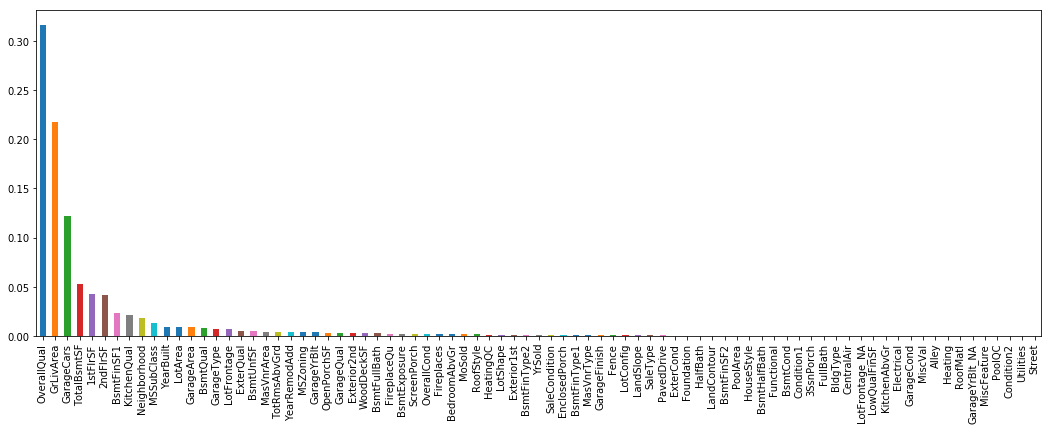

In [184]:
importance = pd.Series(rf_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

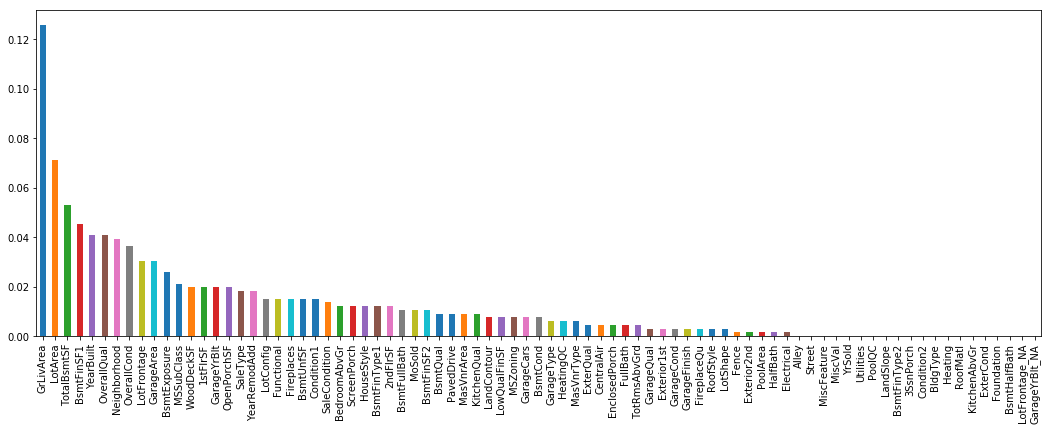

In [185]:

importance = pd.Series(xgb_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

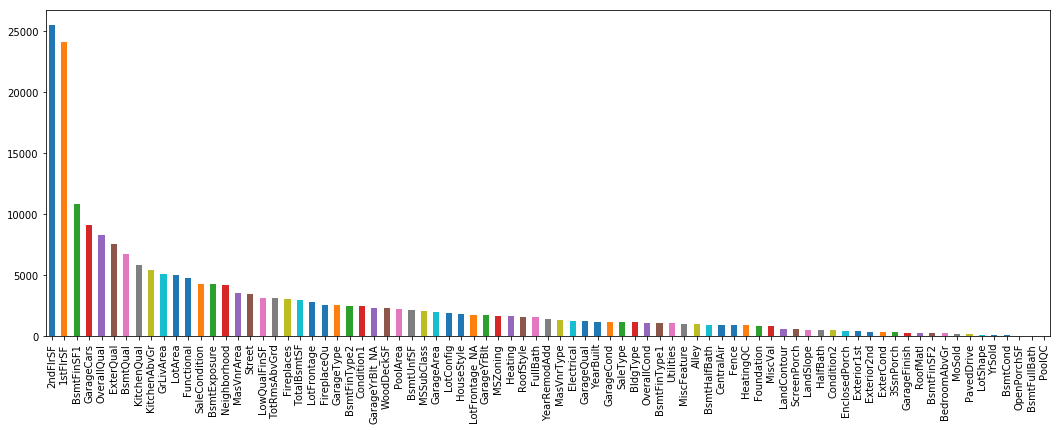

In [186]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))